In [2]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

2.3.1 Data collection and visualization

In [4]:
BTC = pdr.get_data_yahoo('BTC-USD', start = "01/01/2017", interval="d")

In [5]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578


In [6]:
import matplotlib
from matplotlib.pyplot import *

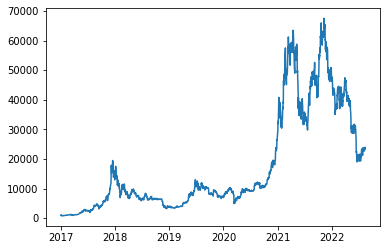

In [7]:
plot(BTC["Close"])
show()

In [8]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2050 entries, 2017-01-01 to 2022-08-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2050 non-null   float64
 1   Low        2050 non-null   float64
 2   Open       2050 non-null   float64
 3   Close      2050 non-null   float64
 4   Volume     2050 non-null   int64  
 5   Adj Close  2050 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.1 KB


2.3.2.3 Continuously compounded returns

In [9]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.033816
2022-08-11    0.000413
2022-08-12   -0.004113
Name: R, Length: 2050, dtype: float64


In [10]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

In [11]:
BTC= BTC.dropna()

2.3.2.4 Descriptive statistics of returns

In [12]:
sumret = BTC["R"].describe()
sumret

count    2049.000000
mean        0.002412
std         0.041359
min        -0.371695
25%        -0.015882
50%         0.002216
75%         0.020916
max         0.252472
Name: R, dtype: float64

In [13]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


In [14]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


In [15]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.0015489689232642161
The daily variance of Bitcoin is  0.0017364169331031323
The daily standard deviation (volatility) of Bitcoin return is  0.04167033636897034
The daily median return of Bitcoin is  0.0022137248439948465


### **Histogram**


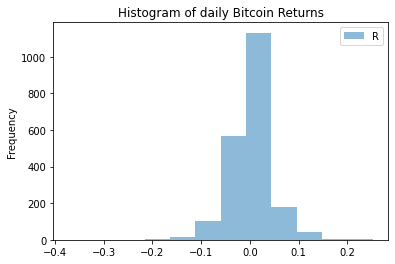

In [16]:
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

Use the mean and standard deviation of the historical cc returns of Bitcoin and simulate the same number of returns as the days we downloaded in the BTC dataframe. 
In one plot show both, the real distribution of historical cc returns and the simulated normal distribution.

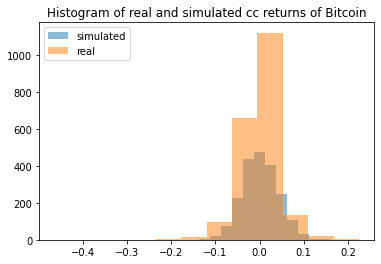

In [17]:
from matplotlib import pyplot
pyplot.clf()
rmean = BTC["r"].mean()
rsd = BTC["r"].std()
N = BTC["r"].count()
x= np.random.normal(loc=rmean,scale=rsd, size=N)
y = BTC["r"].to_numpy()

bins = 12

pyplot.hist(x, bins, alpha = 0.5, label = 'simulated')
pyplot.hist(y, bins, alpha = 0.5, label = 'real')
pyplot.legend(loc='upper left')
pyplot.title(label='Histogram of real and simulated cc returns of Bitcoin')
pyplot.show()